In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit

/tmp/ipykernel_180/2899477610.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [73]:
font = {'family' : 'latex',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 14,
                    'font.weight': 'bold',
                    "figure.constrained_layout.use"     : True ,
                    'font.family':'cmr10',
                    'axes.formatter.use_mathtext':True,
                    'mathtext.fontset':'cm',
                    "figure.constrained_layout.h_pad"   : 0,
                    "figure.constrained_layout.hspace"   : 0,
                    "figure.constrained_layout.w_pad"   : 0,
                    "figure.constrained_layout.wspace"   : 0,
                    'xtick.direction'  : 'in',
                    'xtick.minor.visible': False})

In [25]:
fname_HEP_5_cuts = "HEP_out_5"
HEP_5_cuts = pd.read_csv(fname_HEP_5_cuts, sep='\\s+')
HEP_5_seq_time = 1033
HEP_5_seq_task_time = 2644
HEP_5_cuts

,best_acc,averageInteractionsPerCrossing,p_Rhad,p_Rhad1,p_TRTTrackOccupancy,p_topoetcone40,p_eTileGap3Cluster,p_phiModCalo,p_etaModCalo,Number_of_settings,Elapsed_time,task_time_[mus],n_ranks
0,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,12.0620,30.8787,128
1,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,22.4560,57.4873,64
2,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,45.3838,116.1820,32
3,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,91.5041,234.2510,16
4,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,187.4670,479.9160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,12.8456,32.8848,116
64,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,13.9247,35.6472,106
65,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,13.7390,35.1718,108
66,0.736772,44.8089,0.038668,0.024703,0.47837,5.56126,0.296749,-0.000003,0.012539,390625,12.3304,31.5659,122


In [26]:
fname_HEP_4_cuts = "HEP_out"
HEP_4_cuts = pd.read_csv(fname_HEP_4_cuts, sep='\\s+')
HEP_4_seq_time = 173.5
HEP_4_seq_task_time = 2647
HEP_4_cuts

,best_acc,averageInteractionsPerCrossing,p_Rhad,p_Rhad1,p_TRTTrackOccupancy,p_topoetcone40,p_eTileGap3Cluster,p_phiModCalo,p_etaModCalo,Number_of_settings,Elapsed_time,task_time_[mus],n_ranks
0,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,7.65195,116.7590,32
1,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,3.90716,59.6186,64
2,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,15.34660,234.1700,16
3,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,2.33200,35.5835,128
4,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,31.48330,480.3960,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,2.63113,40.1479,108
60,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,2.43349,37.1321,120
61,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,3.01476,46.0016,88
62,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,3.13799,47.8819,84


In [88]:
p52[0].get_marker
plt.legend(

<bound method Line2D.get_marker of <matplotlib.lines.Line2D object at 0x7f5c1fda07f0>>

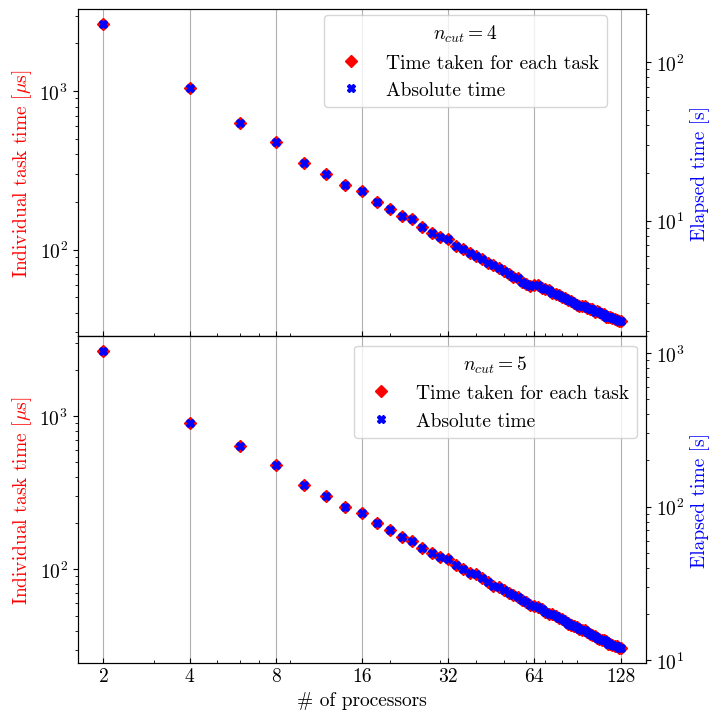

In [104]:

#plt.plot(, , '.', label="Task time [$\mu$s]")
#plt.plot(, , '.', label="Absolute time [s]")
#plt.yscale('log')

fig, ax1 = plt.subplots(2,1,figsize = (7,7),sharex = True)
# Plotting the first dataset
ax1[0].plot(HEP_4_cuts["n_ranks"], HEP_4_cuts["task_time_[mus]"], 'rD', label="Time taken for each task")
ax1[1].set_xlabel('# of processors', fontweight="bold")
ax1[0].set_ylabel('Individual task time [$\mu$s]', color='r', fontweight="bold")
ax1[1].set_ylabel('Individual task time [$\mu$s]', color='r', fontweight="bold")

# Creating the second y-axis

ax2 = ax1[0].twinx(),ax1[1].twinx()
ax2[0].plot(HEP_4_cuts["n_ranks"], HEP_4_cuts["Elapsed_time"], 'bX', label="Absolute time")
ax2[0].set_ylabel('Elapsed time [s]', color='b', fontweight='bold')

ax1[0].set_yscale('log')
ax2[0].set_yscale('log')
ax1[0].set_xscale('log')
ax2[0].set_xscale('log')
ax1[0].grid(True, axis = 'x')
fig.legend(loc = (0.45,0.85),title = '$n_{cut}=4$')
ax1[1].set(xticks = [],xticklabels = [])
ax2[1].set(xticks = [2,4,8,16,32,64,128],xticklabels = [2,4,8,16,32,64,128])
ax2[1].set_ylabel('Elapsed time [s]', color='b', fontweight='bold')
ax1[1].grid(True, axis = 'x')
ax1[1].set_yscale('log')
ax2[1].set_yscale('log')

p51,=ax1[1].plot(HEP_5_cuts["n_ranks"], HEP_5_cuts["task_time_[mus]"], 'rD', label="Time taken for each task")
p52,=ax2[1].plot(HEP_5_cuts["n_ranks"], HEP_5_cuts["Elapsed_time"], 'bX', label="Absolute time")
ax1[1].legend(handles=[p51,p52],title = '$n_{cut}=5$')
plt.show()
fig.savefig('../Report/Time_scaling.pdf')

In [97]:
def amdahl(N,a,p):
    return a/((1-p)+p/(N-1))

def _least_squares(x,y,a,p):
    ymod = amdahl(x,a,p)
    return np.sum((np.log(ymod)-np.log(y))**2)

least_squares_4 = lambda a,pinv: _least_squares(HEP_4_cuts["n_ranks"],
                                           1/HEP_4_cuts["Elapsed_time"],
                                           a,(1-pinv))
HEP4_min = Minuit(least_squares_4, a = 1/HEP_4_seq_time, pinv = 0.001)
HEP4_min.fixed["a"] = True
display(HEP4_min.migrad())
a4,p4 = HEP4_min.values[:]

least_squares_5 = lambda a,pinv: _least_squares(HEP_5_cuts["n_ranks"],
                                           1/HEP_5_cuts["Elapsed_time"],
                                           a,(1-pinv))
HEP5_min = Minuit(least_squares_5, a = 1/HEP_5_seq_time, pinv = 0.001)
HEP5_min.fixed["a"] = True
display(HEP5_min.migrad())
a5,p5 = HEP5_min.values[:]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.4334                     │              Nfcn = 22               │
│ EDM = 1.11e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  5.76e-3  │  0.06e-3  │            │            │         │         │  yes  │
│ 1 │ pinv │  0.0064   │  0.0027   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────┐
│      │        a     pinv │
├──────┼───────────────────┤
│    a │        0     0e-6 │
│ pinv │     0e-6 7.46e-06 │
└──────┴───────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.686                      │              Nfcn = 22               │
│ EDM = 2.61e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  968e-6   │   10e-6   │            │            │         │         │  yes  │
│ 1 │ pinv │  0.0050   │  0.0024   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────┐
│      │        a     pinv │
├──────┼───────────────────┤
│    a │        0     0e-6 │
│ pinv │     0e-6 5.82e-06 │
└──────┴───────────────────┘

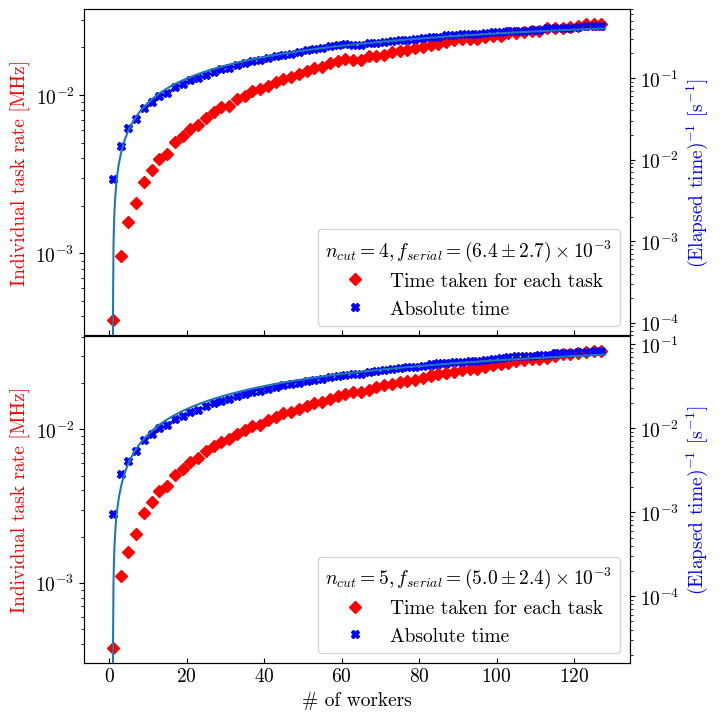

In [112]:
fig, ax1 = plt.subplots(2,1,figsize = (7,7),sharex = True)
# Plotting the first dataset
p41,=ax1[0].plot(HEP_4_cuts["n_ranks"]-1, 1/HEP_4_cuts["task_time_[mus]"], 'rD', label="Time taken for each task")
ax1[0].set_ylabel('Individual task rate [MHz]', color='r', fontweight="bold")
# Creating the second y-axis
ax2 = ax1[0].twinx(),ax1[1].twinx()
p42,=ax2[0].plot(HEP_4_cuts["n_ranks"]-1, 1/HEP_4_cuts["Elapsed_time"], 'bX', label="Absolute time")

plotNranks = np.linspace(0,128,1000)

ax2[0].plot(plotNranks, amdahl(plotNranks,1/HEP_4_seq_time,1-p4))

ax2[0].set_ylabel('(Elapsed time)$^{-1}$ [s$^{-1}$]', color='b', fontweight='bold')
ax1[0].set_yscale('log')
ax2[0].set_yscale('log')

ax1[0].legend(handles=[p41,p42],title =  '$n_{cut}=4, f_{serial}='+f'({p4*1000:.1f}\pm{HEP4_min.errors[1]*1000:.1f})'+r'\times 10^{-3}$')
ax2[0].set(ylim=(7e-5,0.7))

p51,=ax1[1].plot(HEP_5_cuts["n_ranks"]-1, 1/HEP_5_cuts["task_time_[mus]"], 'rD', label="Time taken for each task")
ax1[1].set_xlabel('# of workers', fontweight="bold")
ax1[1].set_ylabel('Individual task rate [MHz]', color='r', fontweight="bold")

p52,=ax2[1].plot(HEP_5_cuts["n_ranks"]-1, 1/HEP_5_cuts["Elapsed_time"], 'bX', label="Absolute time")

plotNranks = np.linspace(0,128,1000)

ax2[1].plot(plotNranks, amdahl(plotNranks,1/HEP_5_seq_time,1-p5))

ax2[1].set_ylabel('(Elapsed time)$^{-1}$ [s$^{-1}$]', color='b', fontweight='bold')
ax1[1].set_yscale('log')
ax2[1].set_yscale('log')

ax1[1].legend(handles = [p51,p52],title =  '$n_{cut}=5, f_{serial}='+f'({p5*1000:.1f}\pm{HEP5_min.errors[1]*1000:.1f})'+r'\times 10^{-3}$')


plt.show()
fig.savefig('../Report/Amdahl.pdf')

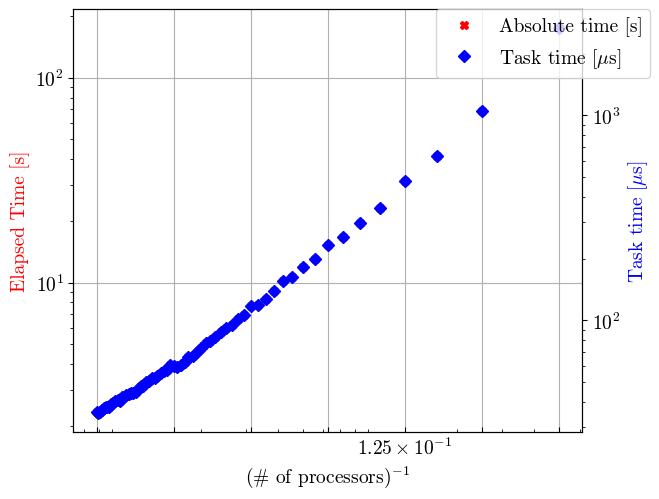

In [102]:
fig, ax1 = plt.subplots()
# Plotting the first dataset
ax1.set_xlabel('(# of processors)$^{-1}$', fontweight="bold")
ax1.set_ylabel('Elapsed Time [s]', color='r', fontweight="bold")
# Creating the second y-axis
ax2 = ax1.twinx()
ax2.plot(1/HEP_4_cuts["n_ranks"], HEP_4_cuts["task_time_[mus]"], 'bD', label="Task time [$\mu$s]")
ax1.plot(1/HEP_4_cuts["n_ranks"], HEP_4_cuts["Elapsed_time"], 'rX', label="Absolute time [s]")


plotNranks = np.linspace(0,128,1000)

#ax2.plot(plotNranks, amdahl(plotNranks,1/284,1-1/p4))

ax2.set_ylabel('Task time [$\mu$s]', color='b', fontweight='bold')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set(xticks=[])
ax1.set(xticks=0.5**np.arange(7,0,-1))
fig.legend()
ax1.grid(True)
plt.show()